In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import numpy as np
import scipy.stats as stats

In [3]:
data = pd.read_csv("dataset/LungCancer.csv")
data.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,39.0,2,1,1,2,1,2,2,2.0,2,1,2,1,2,YES
1,M,44.0,1,2,1,2,2,2,1,2.0,1,1,2,2,2,YES
2,F,59.0,1,1,1,2,1,2,1,2.0,1,2,2,1,2,NO
3,M,46.0,1,2,2,1,1,1,1,1.0,1,1,1,2,2,NO
4,F,63.0,1,2,1,1,1,1,1,2.0,1,2,2,1,1,NO


In [5]:
working_df = data.copy()

In [6]:
working_df["GENDER"] = working_df["GENDER"].map({"M": 1, "F": 2})
working_df["LUNG_CANCER"] = working_df["LUNG_CANCER"].map({"YES": 1, "NO": 2})

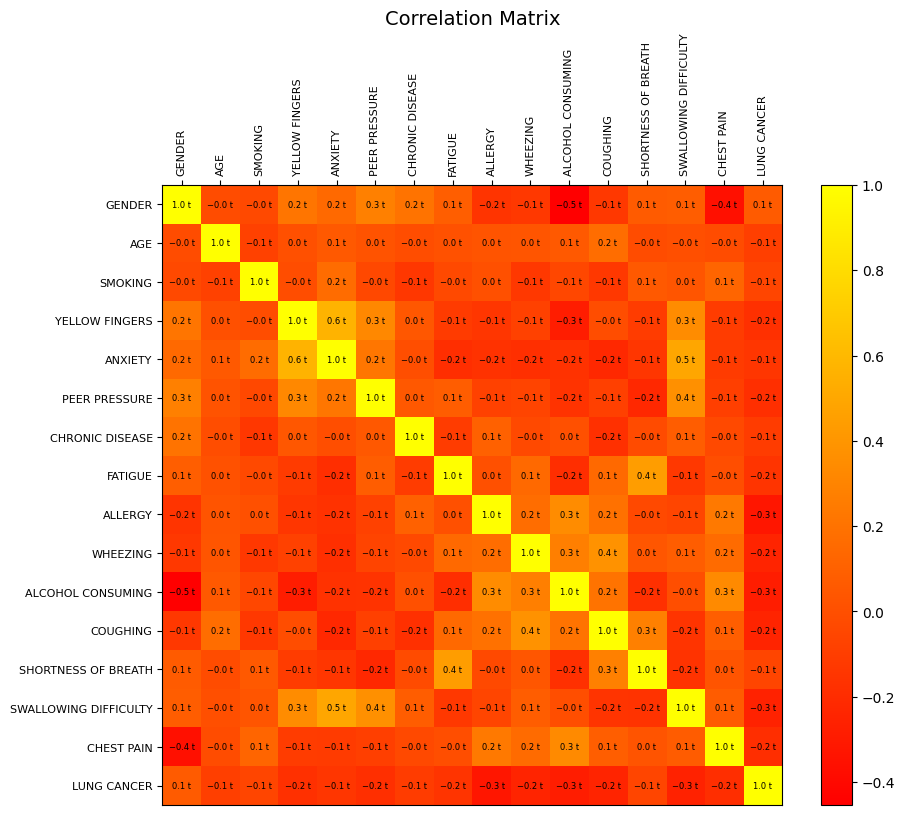

In [11]:
corr = working_df.corr()
plt.figure(figsize=(10, 10))
valfmt = ticker.StrMethodFormatter("{x:.1f} t")
plt.imshow(corr, cmap="autumn", interpolation="nearest")
plt.yticks(np.arange(corr.shape[0]), labels=corr.index.str.replace("_", " "), fontsize=8)
plt.xticks(np.arange(corr.shape[1]), labels=corr.columns.str.replace("_", " "), rotation=90, fontsize=8)
plt.tick_params(top = True, bottom = False, labeltop = True, labelbottom = False)
plt.title("Correlation Matrix", fontsize=14)
ax = plt.gca()
cbar = plt.colorbar()
posax = ax.get_position()
poscb = cbar.ax.get_position()
cbar.ax.set_position([poscb.x0, posax.y0, poscb.width, posax.height])
for x in range(len(corr.columns)):
    for y in range(len(corr.index)):
        plt.annotate(valfmt(corr.iloc[x, y], None), (x, y), ha="center", va="center", color="black", fontsize=6)

In [12]:
Have_LungCancer = data[data["LUNG_CANCER"] == "YES"]
Have_LungCancer.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,M,39.0,2,1,1,2,1,2,2,2.0,2,1,2,1,2,YES
1,M,44.0,1,2,1,2,2,2,1,2.0,1,1,2,2,2,YES
5,F,75.0,1,2,1,1,2,2,2,2.0,1,2,2,1,1,YES
6,M,47.0,1,2,1,2,2,2,1,2.0,1,1,2,2,2,YES
7,F,51.0,2,2,2,2,1,2,2,1.0,1,1,2,2,1,YES


In [40]:
observed = pd.crosstab(Have_LungCancer["GENDER"], columns="count")["count"]

In [17]:
expected = pd.Series([0.5*len(Have_LungCancer["GENDER"])]*2, index=["F", "M"])

In [41]:
observed

GENDER
F    125
M    145
Name: count, dtype: int64

In [42]:
stats.chisquare(observed.values, expected.values)

Power_divergenceResult(statistic=np.float64(1.4814814814814814), pvalue=np.float64(0.2235428745713169))

## H<sub>0</sub>: There is no difference in the proportion of males and females with lung cancer
## H<sub>a</sub>: There is a difference in the proprotion of males and females with lung cancer 

Result: There is no enough evidence to reject the null hypothesis pvalue = 0.224

In [46]:
contigencytable = pd.crosstab(data["ALLERGY"], data["LUNG_CANCER"])

In [47]:
contigencytable

LUNG_CANCER,NO,YES
ALLERGY,,
1,34,103
2,5,167


In [48]:
stats.chi2_contingency(contigencytable)

Chi2ContingencyResult(statistic=np.float64(31.23895161132366), pvalue=np.float64(2.281421922269228e-08), dof=1, expected_freq=array([[ 17.29126214, 119.70873786],
       [ 21.70873786, 150.29126214]]))

## H<sub>0</sub>: Occurence of Allergy and Lung Cancer are independent
## H<sub>a</sub>: Occurrence of Allergy and Lung Cancer are not independent

Result: We reject the null hypothesis pvalue < 0.0001